<h1>IMPORTING THE LIBRARIES</h1>

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
# Replacing occurrences of tf.get_default_graph() with tf.compat.v1.get_default_graph()
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session())

<h1>DATA PREPROCESSING</h1>

In [199]:
df = pd.read_csv('water_potability.csv')

<p>Checking if there are any null values present in the dataset</p>

In [200]:
df.columns[df.isna().any()]

Index(['ph', 'Sulfate', 'Trihalomethanes'], dtype='object')

<p>Filling the null cells with the mean of the values in the respective columns</p>

In [201]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [202]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [203]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


<p>Visualizing the relationship between different features and the target variable (potability)</p>
<p>This helps in gaining insights into how each feature might influence water potability</p>

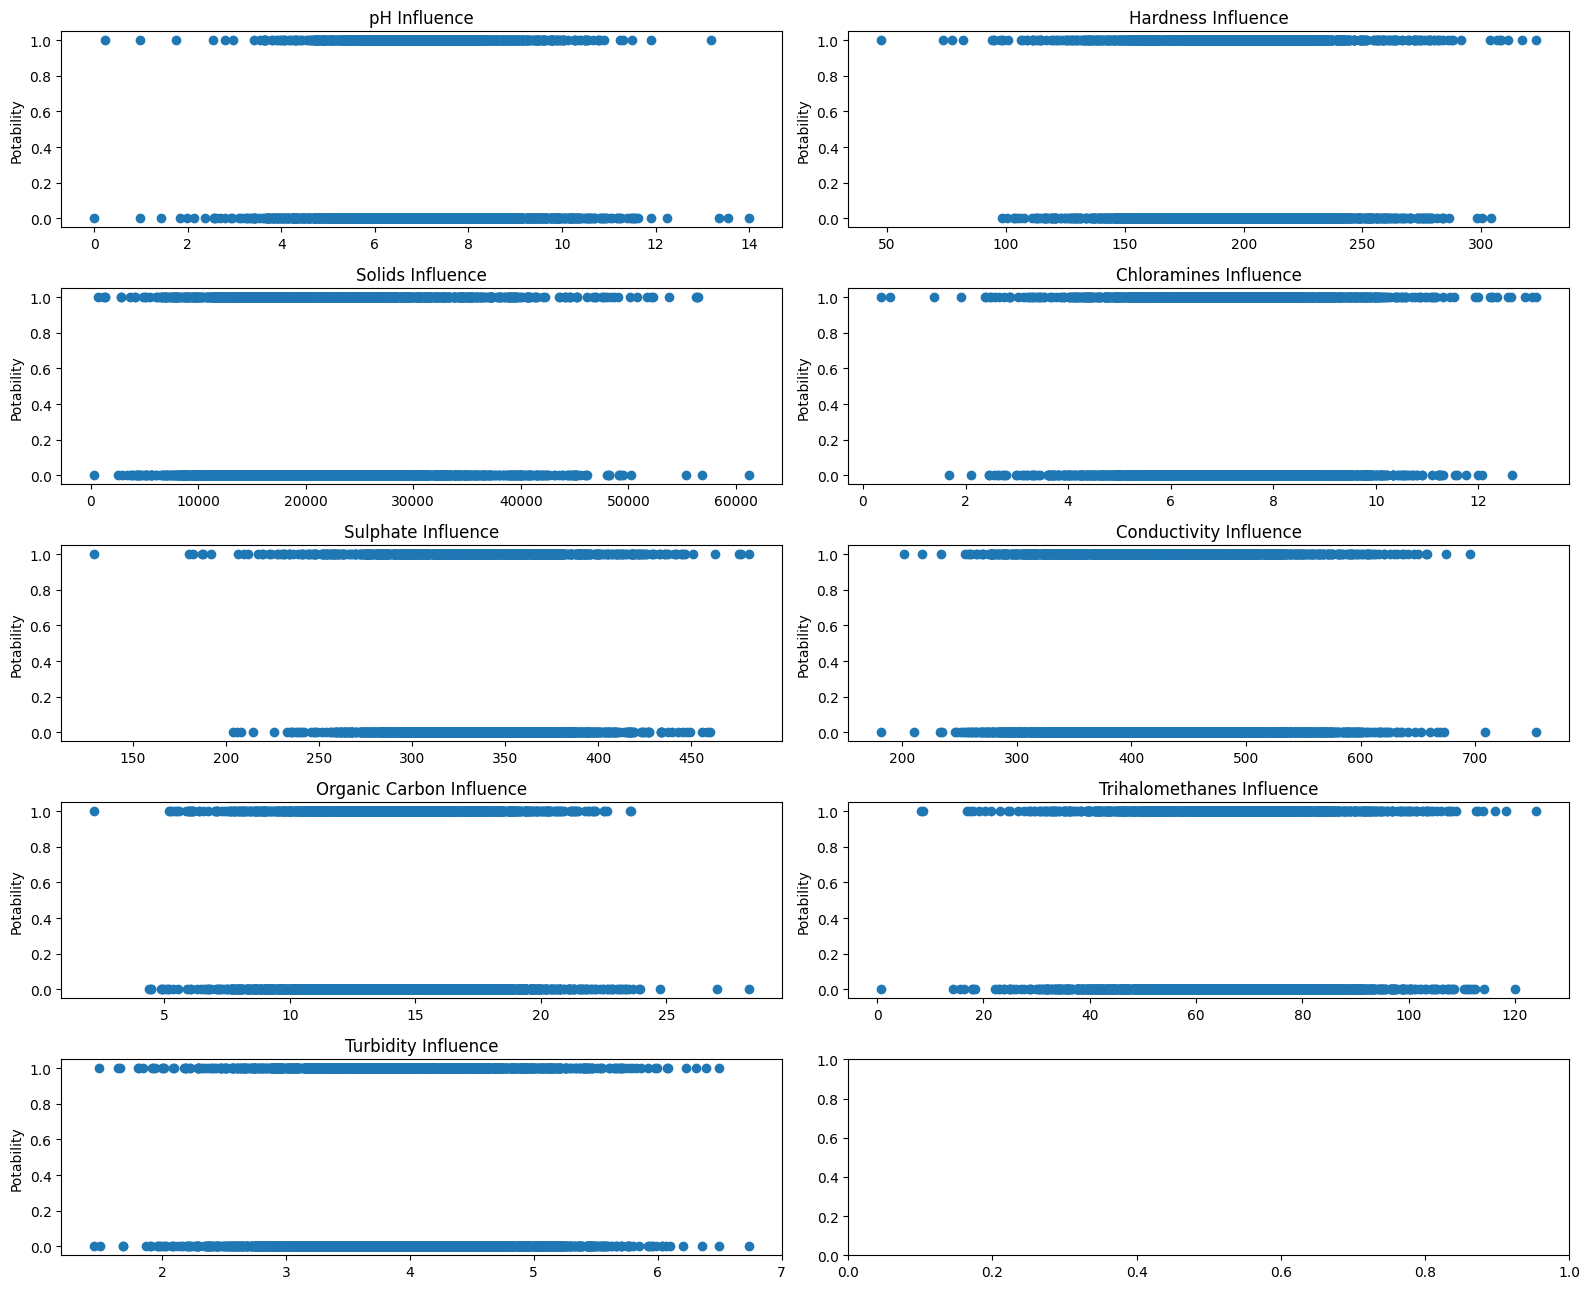

In [204]:
fig,axes = plt.subplots(nrows=5 , ncols=2, figsize=(16,13))

axes[0][0].plot(X['ph'], y,'o')
axes[0][0].set_ylabel("Potability")
axes[0][0].set_title("pH Influence") 

axes[0][1].plot(X['Hardness'], y,'o')
axes[0][1].set_ylabel("Potability")
axes[0][1].set_title("Hardness Influence") 

axes[1][0].plot(X['Solids'], y,'o')
axes[1][0].set_ylabel("Potability")
axes[1][0].set_title("Solids Influence") 

axes[1][1].plot(X['Chloramines'], y,'o')
axes[1][1].set_ylabel("Potability")
axes[1][1].set_title("Chloramines Influence")

axes[2][0].plot(X['Sulfate'], y,'o')
axes[2][0].set_ylabel("Potability")
axes[2][0].set_title("Sulphate Influence") 

axes[2][1].plot(X['Conductivity'], y,'o')
axes[2][1].set_ylabel("Potability")
axes[2][1].set_title("Conductivity Influence")

axes[3][0].plot(X['Organic_carbon'], y,'o')
axes[3][0].set_ylabel("Potability")
axes[3][0].set_title("Organic Carbon Influence")

axes[3][1].plot(X['Trihalomethanes'], y,'o')
axes[3][1].set_ylabel("Potability")
axes[3][1].set_title("Trihalomethanes Influence")

axes[4][0].plot(X['Turbidity'], y,'o')
axes[4][0].set_ylabel("Potability")
axes[4][0].set_title("Turbidity Influence")
plt.tight_layout();

<p>Splitting the data into training set and test set</p>
<p>Training_set = 85% of dataset</p>
<p>Test_set = 15% of dataset</p>

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

<p>Scaling the features</p>

In [206]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

<h2>USING ARTIFICIAL NEURAL NETWORKS FOR CLASSIFICATION</h2>

In [207]:
ann = tf.keras.models.Sequential()

<p>Adding the input layer and 2 hidden layers</p>

In [208]:
ann.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))

<p>Adding the output layer</p>

In [209]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [210]:
ann.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [211]:
ann.fit(X_train_scaled, y_train, batch_size=16 ,epochs=500)

Epoch 1/500
174/174 [==============================] - 3s 3ms/step - loss: 0.6984 - accuracy: 0.6006
Epoch 2/500
174/174 [==============================] - 1s 3ms/step - loss: 0.6727 - accuracy: 0.6078
Epoch 3/500
174/174 [==============================] - 1s 3ms/step - loss: 0.6634 - accuracy: 0.6078
Epoch 4/500
174/174 [==============================] - 1s 4ms/step - loss: 0.6584 - accuracy: 0.6078
Epoch 5/500
174/174 [==============================] - 1s 4ms/step - loss: 0.6546 - accuracy: 0.6078
Epoch 6/500
174/174 [==============================] - 1s 4ms/step - loss: 0.6500 - accuracy: 0.6078
Epoch 7/500
174/174 [==============================] - 1s 3ms/step - loss: 0.6463 - accuracy: 0.6078
Epoch 8/500
174/174 [==============================] - 1s 3ms/step - loss: 0.6425 - accuracy: 0.6078
Epoch 9/500
174/174 [==============================] - 1s 4ms/step - loss: 0.6386 - accuracy: 0.6078
Epoch 10/500
174/174 [==============================] - 1s 3ms/step - loss: 0.6346 - accura

<p>Predicting the test set values</p>

In [212]:
y_pred = ann.predict(X_test_scaled)

16/16 [==============================] - 0s 5ms/step


In [213]:
y_pred_binary = (y_pred > 0.5)

In [214]:
cm = confusion_matrix(y_test,y_pred_binary)
print(cm)

[[206 100]
 [ 79 107]]


In [215]:
accuracy = accuracy_score(y_test,y_pred_binary)
accuracy

0.6361788617886179